In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import csv
import requests

In [2]:
url = "https://dhhumanist.org"
result = requests.get("https://dhhumanist.org/")

print(result.status_code)
print(result.headers)
page = result.content

# How would we get all the links to volumes from the Humanist Page?

soup = BeautifulSoup(page)

200
{'Server': 'ATS', 'Date': 'Sat, 04 Apr 2020 20:23:09 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '5743', 'X-Frame-Options': 'SAMEORIGIN', 'Age': '0', 'Connection': 'keep-alive'}


https://dhhumanist.org/Archives/Current/ https://dhhumanist.org/Archives/Converted_Text/

In [3]:
links = ['https://dhhumanist.org/Archives/Converted_Text/', 'https://dhhumanist.org/Archives/Current/']
texts = []
for link in links:
    result = requests.get(link)
    page = result.content

    soup = BeautifulSoup(page)
    text_links = soup.find_all('a')
    for txt_link in text_links:
        url = txt_link.get('href')
        if 'txt' in url:
            print(link+url)
            text_result = requests.get(link+url)
            text_page = text_result.content
            text_soup = BeautifulSoup(text_page)
            dates = url.split('.')[1]
            text = text_soup.get_text()
            texts.append({'dates': dates, 'text': text})

In [4]:
# # Turn our web scraped data in a dataframe
humanist_vols = pd.DataFrame.from_dict(texts, orient='columns')

In [10]:
# Write to csv
humanist_vols.to_csv('web_scraped_humanist_listserv.csv')

In [7]:
#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer

all_docs = humanist_vols[0:3].text.tolist()

vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(all_docs)

transformed_documents_as_array = transformed_documents.toarray()

In [8]:
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    print(one_doc_as_df[0:10])

           term      score
0        cmi011  50.794415
1         hirst  44.021827
2           050  42.328680
3         husc6  38.942385
4            q1  32.169796
5  paralanguage  32.169796
6      gargoyle  28.783502
7       deredec  28.783502
8        estfri  28.783502
9           oda  27.090355
         term       score
0       astra  108.361420
1    makrolog   45.714974
2      oikawa   42.328680
3  wesolowski   42.328680
4     voorhis   40.635532
5       melby   37.249238
6       adamo   35.556091
7         sdr   33.862944
8       tovna   32.169796
9       memdb   27.090355
          term       score
0      kessler  237.040605
1    warkentin  133.758627
2      donnell  120.213450
3      fraktur  104.975125
4      lenoble  104.975125
5        halio   88.043653
6      laptops   82.964212
7         unhd   79.577917
8     gutnberg   77.884770
9  uncertainty   72.805329


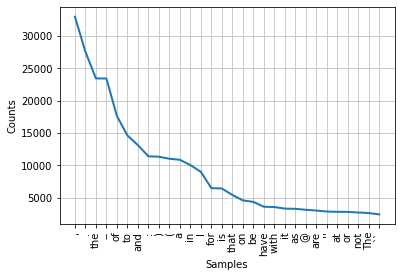

In [9]:
from nltk import word_tokenize
from nltk import FreqDist

tokens = FreqDist(sum(humanist_vols[0:2]['text'].map(word_tokenize), []))
tokens.plot(30)

In [11]:
humanist_vols['humanities_computing_counts'] = humanist_vols.text.apply(lambda x: x.count('humanities computing'))
humanist_vols['digital_humanities_counts'] = humanist_vols.text.apply(lambda x: x.count('digital humanities'))

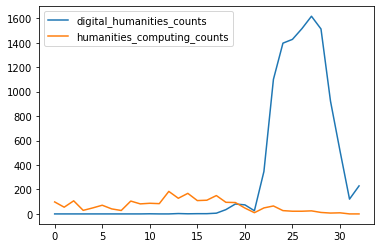

In [12]:
counts_humanist = humanist_vols[['digital_humanities_counts', 'humanities_computing_counts']]
counts_humanist.plot()